# Analysis

Stage 4: generate plots and summary statistics

In [1]:
import pandas as pd

## Recent trends

Look at last five years

In [5]:
brl_always = pd.read_excel('results/all_brl.xlsx')

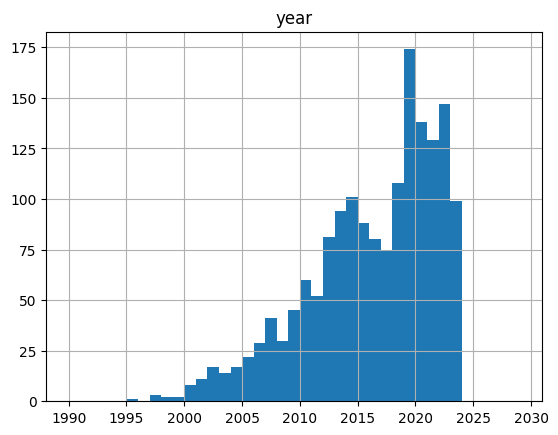

In [6]:
hist = brl_always.hist(column=['year'],bins=range(1990,2030))

## Focus on 2022 and 2023

In [7]:
brl_2023 = pd.read_excel('results/brl_2023_2023.xlsx')

In [9]:
total_num_papers = len(brl_2023)
total_num_papers

246

In [40]:
authors = set([])
for a in brl_2023['uwe_author_list']:
    if type(a)==str:
        #print(eval(a))
        authors = authors.union(set(eval(a)))
for a in brl_2023['uob_author_list']:
    if type(a)==str:
        #print(eval(a))
        authors = authors.union(set(eval(a)))
for a in brl_2023['scholar_author_list']:
    if type(a)==str:
        #print(eval(a))
        authors = authors.union(set(eval(a)))
authors

{'Carlos A. Cifuentes',
 'Charlie Yang',
 'Chris Melhuish',
 'Dr Andrew T Conn',
 'Dr Antonia Tzemanaki',
 'Dr Dandan Zhang',
 'Dr Edmund R Hunt',
 'Dr Efi Psomopoulou',
 'Dr Helmut Hauser',
 'Dr Hemma Philamore',
 'Dr Hermes Gadelha',
 'Dr Matthew Studley',
 "Dr Paul J O'Dowd",
 'Dr Shane P Windsor',
 'Lyndon Smith',
 'Manuel Giuliani',
 'Marcela Munera',
 'Mark Hansen',
 'Martin Pearson',
 'Melvyn Smith',
 'Mr Ben Ward-Cherrier',
 'Mr Martin S Garrad',
 'Paul Bremner',
 'Professor Arthur G Richards',
 'Professor Jonathan M Rossiter',
 'Professor Nathan F Lepora',
 'Professor Sabine Hauert',
 'Professor Tom S Richardson',
 'Tony Pipe'}

In [41]:
total_num_authors = len(authors)
total_num_authors

29

## Collaboration Graph

In [44]:
import networkx as nx
G = nx.Graph()

In [59]:
def merge_author_list_func(this_row):
    alist = []
    if type(this_row.uob_author_list)==str:
        alist = eval(this_row.uob_author_list)
    if type(this_row.uwe_author_list)==str:
        alist = alist + eval(this_row.uwe_author_list)
    if type(this_row.scholar_author_list)==str:
        alist = alist + eval(this_row.scholar_author_list)
    return alist

brl_2023['all_author_list'] = brl_2023.apply(merge_author_list_func, axis=1)
brl_2023


,Unnamed: 0,title_uob,uob_detail_url,uob_date_str,date_uob,uob_author_list,uob_source_url_list,year,title_lower,title_uwe,...,date_uwe,uwe_author_list,uwe_source_url_list,title,scholar_year_str,scholar_author_list,scholar_source_url_list,scholar_detail_url_list,all_brl_authors,all_author_list
0,0,A configuration-optimisation method for passiv...,https://research-information.bris.ac.uk/en/pub...,15 Nov 2023,2023-11-15,['Dr Andrew T Conn'],['https://research-information.bris.ac.uk/en/p...,2023,a configuration-optimisation method for passiv...,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[Dr Andrew T Conn]
1,1,A robotIc Radial palpatIon mechaniSm for breas...,https://research-information.bris.ac.uk/en/pub...,31 Aug 2023,2023-08-31,"['Dr Andrew T Conn', 'Dr Antonia Tzemanaki']",['https://research-information.bris.ac.uk/en/p...,2023,a robotic radial palpation mechanism for breas...,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[Dr Andrew T Conn, Dr Antonia Tzemanaki]"
2,2,Biodegradable Humidity Actuators for Sustainab...,https://research-information.bris.ac.uk/en/pub...,3 Apr 2023,2023-04-03,"['Dr Andrew T Conn', 'Professor Jonathan M Ros...",['https://research-information.bris.ac.uk/en/p...,2023,biodegradable humidity actuators for sustainab...,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[Dr Andrew T Conn, Professor Jonathan M Rossiter]"
3,3,Enhancing the trade-off between ride comfort a...,https://research-information.bris.ac.uk/en/pub...,2023,2023-01-01,['Dr Andrew T Conn'],['https://research-information.bris.ac.uk/en/p...,2023,enhancing the trade-off between ride comfort a...,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],[Dr Andrew T Conn]
4,4,ESPRESS.0: Eustachian Tube-Inspired Tactile Se...,https://research-information.bris.ac.uk/en/pub...,4 Jan 2023,2023-01-04,"['Dr Andrew T Conn', 'Dr Antonia Tzemanaki']",['https://research-information.bris.ac.uk/en/p...,2023,espress.0: eustachian tube-inspired tactile se...,NaN,...,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],"[Dr Andrew T Conn, Dr Antonia Tzemanaki]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,1619,NaN,NaN,NaN,NaT,NaN,NaN,2022,assessment of a robotic walker in older adults...,NaN,...,NaT,NaN,NaN,Assessment of a Robotic Walker in Older Adults...,2022.0,"['Carlos A. Cifuentes', 'Marcela Munera']",['https://scholar.google.com/citations?hl=en&u...,['https://scholar.google.com/citations?view_op...,[],"[Carlos A. Cifuentes, Marcela Munera]"
242,1620,NaN,NaN,NaN,NaT,NaN,NaN,2022,"kinematics, actuation, and sensing architectur...",NaN,...,NaT,NaN,NaN,"Kinematics, Actuation, and Sensing Architectur...",2022.0,"['Carlos A. Cifuentes', 'Marcela Munera']",['https://scholar.google.com/citations?hl=en&u...,['https://scholar.google.com/citations?view_op...,[],"[Carlos A. Cifuentes, Marcela Munera]"
243,1621,NaN,NaN,NaN,NaT,NaN,NaN,2022,experiences of clinicians using rehabilitation...,NaN,...,NaT,NaN,NaN,Experiences of Clinicians Using Rehabilitation...,2022.0,"['Carlos A. Cifuentes', 'Marcela Munera']",['https://scholar.google.com/citations?hl=en&u...,['https://scholar.google.com/citations?view_op...,[],"[Carlos A. Cifuentes, Marcela Munera]"
244,1622,NaN,NaN,NaN,NaT,NaN,NaN,2022,assessment of robotic devices for gait assista...,NaN,...,NaT,NaN,NaN,Assessment of Robotic Devices for Gait Assista...,2022.0,"['Carlos A. Cifuentes', 'Marcela Munera']",['https://scholar.google.com/citations?hl=en&u...,['https://scholar.google.com/citations?view_op...,[],"[Carlos A. Cifuentes, Marcela Munera]"


In [118]:
for a in brl_2023['all_author_list']:
    if len(a)>1:
        #print(a)
        for i in range(len(a)):
            for j in range(i):
                #print(i,j)
                #print(a[i],a[j])
                G.add_edge(a[i],a[j])

In [261]:
import re
def fix_label(lab):
    new_lab = lab.replace('Professor','')
    new_lab = new_lab.replace('Dr','')
    new_lab = new_lab.replace('Mr','')
    new_lab = re.sub(' [A-Z] ', ' ', new_lab)
    new_lab = re.sub(' [A-Z]\. ', ' ', new_lab)
    new_lab = new_lab.replace(' ','\n')
    return(new_lab.strip())
print(fix_label('Professor Arthur G Richards'))

Arthur
Richards


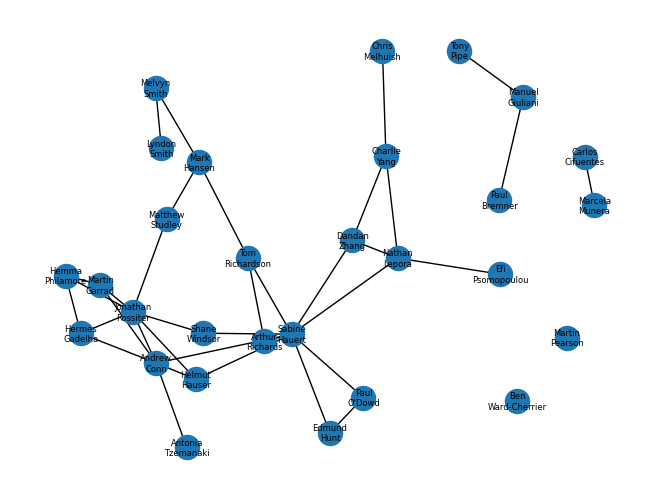

In [262]:
#pos = nx.random_layout(G)
#pos = nx.circular_layout(G)
pos = nx.planar_layout(G)
#pos = nx.bipartite_layout(G)
#pos = nx.kamada_kawai_layout(G, weight=None)
pos = nx.spring_layout(G,k=1,pos = pos, weight=None)
nx.draw(G, pos)

label_dict = {n: fix_label(n) for n in G}
labels = nx.draw_networkx_labels(G, pos, font_size=6, labels=label_dict)